# AData Example
## Load data from fits file

In [1]:
%matplotlib inline
import sys
sys.path.append('../')

from acalib.core import *
#from astropy import log
from matplotlib import pyplot as plt

binpath='../bindata/fits/cubes/'
#fn=binpath+'Orion.methanol.cbc.contsub.image.fits'
fn=binpath+'M100line.image.fits'

# Load from container
c = AContainer()
c.load(fn)

dt=c.adata[0]

INFO: Processing HDU 0 (Image) [acalib.io.formats]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.formats]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


## Simple Checks

In [2]:
# Simple Checks
shape=dt.shape()
print('Shape = '+str(shape))
pixels=dt.count()
print('Pixels = '+str(pixels))
tflux=dt.flux()
print('Total Flux =  '+str(tflux))
vflux=dt.variance()
print('Flux Variance =  '+str(vflux))
mmax=dt.max()
mmin=dt.min()
print('Max/Min = '+str(mmax)+', '+str(mmin))
rms=dt.estimate_rms()
print('RMS =  '+str(rms))
print('WCS axes = '+str(dt.axis_names()))
l1=dt.wcs_limits(0)
l2=dt.wcs_limits(1)
l3=dt.wcs_limits(2)
print('WCS limits = '+str(l1)+' '+str(l2)+' '+str(l3)+' ')
iw=dt.index_to_wcs((20,300,300))
print('WCS center= '+str(iw))



Shape = (40, 600, 600)
Pixels = 8322548
Total Flux =  1819.58
Flux Variance =  0.00980660768944
Max/Min = (0.53838682, (14, 312, 290)), (-0.097036667, (15, 321, 308))
RMS =  0.00980904121182
WCS axes = ['RA', 'DEC', 'FREQ']
WCS limits = (185.77211742963772, 185.68550913950884) (15.777704037845158, 15.861037405297127) (114585550000.0, 114741800000.0) 
WCS center= [  1.85728750e+02   1.58194444e+01   1.14665628e+11]


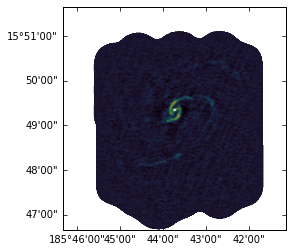

In [14]:
wcs=dt.wcs.dropaxis(2)
plt.subplot(111,projection=wcs)
plt.imshow(dt.stack(), origin='lower', cmap='cubehelix')